In [2]:
from nanopyx.methods.eSRRF_workflow import eSRRF
from nanopyx.liquid import RadialGradientConvergence, CRShiftAndMagnify, GradientRobertsCross
from nanopyx.data.download import ExampleDataManager
import numpy as np
import matplotlib.pyplot as plt

downloader = ExampleDataManager()
im = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True)

/Users/imcunha/Documents/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for _njit_interpolate
  warnings.warn(
/Users/imcunha/Documents/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_magnify
  warnings.warn(
/Users/imcunha/Documents/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_scale_rotate
  warnings.warn(
/Users/imcunha/Documents/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for _njit_mandelbrot
  warnings.warn(
/Users/imcunha/Documents/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for njit_mandelbrot
  warnings.warn(


If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


In [7]:
im.dtype

dtype('uint16')

In [4]:
CRShiftAndMagnify(testing=False).benchmark(im,0,0,4,4)
RadialGradientConvergence(testing=False).benchmark(im, im, np.random.random((500, 64, 64)).astype(np.float32))
GradientRobertsCross(testing=False).benchmark(im)

Fastest run type: Threaded_dynamic
Slowest run type: Unthreaded
Threaded_dynamic is 1.10x faster than OpenCL_Apple M1 Pro
Threaded_dynamic is 1.20x faster than Threaded_guided
Threaded_dynamic is 1.35x faster than Threaded_static
Threaded_dynamic is 1.39x faster than Threaded
Threaded_dynamic is 3.87x faster than Unthreaded
OpenCL_Apple M1 Pro is 1.09x faster than Threaded_guided
OpenCL_Apple M1 Pro is 1.22x faster than Threaded_static
OpenCL_Apple M1 Pro is 1.26x faster than Threaded
OpenCL_Apple M1 Pro is 3.51x faster than Unthreaded
Threaded_guided is 1.12x faster than Threaded_static
Threaded_guided is 1.16x faster than Threaded
Threaded_guided is 3.22x faster than Unthreaded
Threaded_static is 1.03x faster than Threaded
Threaded_static is 2.87x faster than Unthreaded
Threaded is 2.79x faster than Unthreaded
Fastest run type: Threaded_guided
Slowest run type: Threaded_dynamic
Threaded_guided is 1.20x faster than Threaded
Threaded_guided is 1.22x faster than Threaded_static
Threaded

[(0.007317624986171722, 'Threaded_dynamic', None),
 (0.007543083047494292, 'Threaded_guided', None),
 (0.007966833014506847, 'Threaded_static', None),
 (0.008159999968484044, 'Threaded', None),
 (0.013663999969139695, 'Unthreaded', None)]

In [7]:
esrrf = eSRRF(im)
imRGC = esrrf.run()

Agent: ShiftMagnify_CR using Unthreaded ran in 5.304768959002104 seconds
Agent: GradientRobertsCross using Threaded_static ran in 0.010198499949183315 seconds
Agent: ShiftMagnify_CR using Unthreaded ran in 21.56035358295776 seconds
Agent: ShiftMagnify_CR using Unthreaded ran in 22.027486958017107 seconds


IndexError: index -1 is out of bounds for axis 0 with size 0

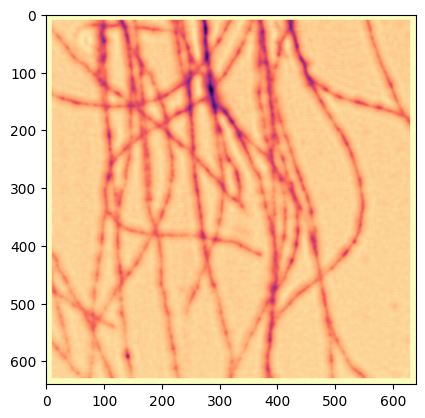

In [4]:
plt.imshow(np.mean(imRGC[0],0),cmap="magma_r")